# Rathmines - Data Analysis 

# Import Packages

In [28]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, max_error

from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

from sklearn.neural_network import MLPRegressor

# Import and Clean data

In [29]:
df = pd.read_csv('C:\\Users\\User\\Final Year Project/Dublin Airport Met and Pollutant Data 17-19 (Rows deleted and Hour fixed).csv', thousands=',', low_memory=False)
# You can also open with Excel and take a look at it.

In [30]:
df = df.dropna(axis=0)

In [31]:
df.head(5)

Date  Hour  indrain  rain  indtemp  temp  indwetb  wetb  \
7801  22/11/2017 12:00    12        0   0.6        0   8.8        0   8.7   
7802  22/11/2017 13:00    13        0   0.4        0   9.0        0   8.9   
7803  22/11/2017 14:00    14        0   0.2        0   9.1        0   9.0   
7804  22/11/2017 15:00    15        0   0.2        0   9.1        0   9.0   
7805  22/11/2017 16:00    16        0   0.5        0   7.0        0   6.9   

      dewpt  vappr  ...   vis  clht  clamt    NOX    NO    NO2  Ozone  SO2  \
7801    8.5   11.2  ...  5000    12      8  31.90  2.13  28.65   46.4  3.5   
7802    8.7   11.3  ...  4000    14      8  44.89  6.75  34.38   46.2  3.5   
7803    8.9   11.4  ...  8000     6      8  47.37  4.63  40.30   35.0  3.2   
7804    8.9   11.4  ...  8000     6      8  64.18  6.75  54.05   17.8  3.5   
7805    6.7    9.9  ...  8000     6      8  67.81  5.88  58.64   12.4  3.7   

      PM25  PM10  
7801   2.7   3.3  
7802   4.8   5.5  
7803   6.9   7.8  
7804   9.6  10.8  
7805  10.2  11.2  

[5 rows x 29 columns]

In [32]:
df.tail(5)

Date  Hour  indrain  rain  indtemp  temp  indwetb  wetb  \
25301  31/12/2019 05:00     5        0   0.0        0   5.7        0   4.8   
25302  31/12/2019 06:00     6        0   0.0        0   4.9        0   3.9   
25303  31/12/2019 07:00     7        0   0.0        0   5.5        0   4.7   
25304  31/12/2019 08:00     8        0   0.0        0   6.8        0   5.8   
25305  31/12/2019 09:00     9        0   0.0        0   6.6        0   5.7   

       dewpt  vappr  ...    vis  clht  clamt   NOX   NO   NO2  Ozone   SO2  \
25301    3.6    7.9  ...  25000   160      6   8.0  0.4   7.4   75.0  0.27   
25302    2.5    7.3  ...  25000   200      4  20.8  3.0  16.2   67.6  0.27   
25303    3.6    7.9  ...  25000   130      6  11.8  1.0  10.1   73.8  0.27   
25304    4.4    8.4  ...  25000   130      7  13.4  1.5  10.9   71.2  0.27   
25305    4.5    8.4  ...  25000   130      7  45.8  5.5  37.6   36.8  0.27   

       PM25  PM10  
25301   2.6   7.0  
25302   0.7   6.5  
25303   3.1   8.1  
25304   1.4   6.2  
25305   1.9   6.9  

[5 rows x 29 columns]

In [33]:
#Sanity check
display(df)

Date  Hour  indrain  rain  indtemp  temp  indwetb  wetb  \
7801   22/11/2017 12:00    12        0   0.6        0   8.8        0   8.7   
7802   22/11/2017 13:00    13        0   0.4        0   9.0        0   8.9   
7803   22/11/2017 14:00    14        0   0.2        0   9.1        0   9.0   
7804   22/11/2017 15:00    15        0   0.2        0   9.1        0   9.0   
7805   22/11/2017 16:00    16        0   0.5        0   7.0        0   6.9   
7806   22/11/2017 17:00    17        0   0.1        0   6.8        0   6.6   
7807   22/11/2017 18:00    18        0   0.8        0   6.5        0   6.4   
7808   22/11/2017 19:00    19        0   0.9        0   5.8        0   5.7   
7809   22/11/2017 20:00    20        0   1.5        0   4.7        0   4.5   
7810   22/11/2017 21:00    21        0   0.2        0   4.4        0   4.2   
7811   22/11/2017 22:00    22        0   0.4        0   3.3        0   3.0   
7812   22/11/2017 23:00    23        0   0.1        0   3.1        0   2.8   
7813   23/11/2017 00:00     0        0   0.1        0   3.5        0   3.0   
7814   23/11/2017 01:00     1        0   0.0        0   3.0        0   2.5   
7815   23/11/2017 02:00     2        0   0.0        0   2.8        0   2.3   
7816   23/11/2017 03:00     3        0   0.0        0   3.4        0   2.6   
7817   23/11/2017 04:00     4        0   0.0        0   3.4        0   2.5   
7818   23/11/2017 05:00     5        0   0.0        0   3.4        0   2.5   
7819   23/11/2017 06:00     6        0   0.0        0   3.9        0   2.5   
7820   23/11/2017 07:00     7        2   0.0        0   4.8        0   3.4   
7821   23/11/2017 08:00     8        2   0.0        0   4.6        0   3.8   
7822   23/11/2017 09:00     9        0   0.1        0   5.7        0   4.7   
7823   23/11/2017 10:00    10        0   0.0        0   5.3        0   3.9   
7824   23/11/2017 11:00    11        0   0.0        0   5.9        0   4.8   
7825   23/11/2017 12:00    12        0   0.0        0   6.3        0   5.0   
7826   23/11/2017 13:00    13        2   0.0        0   4.5        0   3.7   
7827   23/11/2017 14:00    14        2   0.0        0   5.7        0   4.2   
7828   23/11/2017 15:00    15        0   0.0        0   5.6        0   4.0   
7829   23/11/2017 16:00    16        0   0.0        0   4.9        0   3.5   
7830   23/11/2017 17:00    17        0   0.0        0   4.3        0   3.1   
...                 ...   ...      ...   ...      ...   ...      ...   ...   
25276  30/12/2019 04:00     4        3   0.0        0   6.3        0   5.9   
25277  30/12/2019 05:00     5        0   0.0        0  10.0        0   7.8   
25278  30/12/2019 06:00     6        0   0.0        0  10.5        0   8.1   
25279  30/12/2019 07:00     7        0   0.0        0  10.6        0   8.1   
25280  30/12/2019 08:00     8        0   0.0        0  10.4        0   7.9   
25281  30/12/2019 09:00     9        0   0.0        0   9.0        0   7.6   
25282  30/12/2019 10:00    10        0   0.0        0   8.9        0   7.8   
25283  30/12/2019 11:00    11        0   0.0        0   9.3        0   8.2   
25284  30/12/2019 12:00    12        0   0.0        0   9.6        0   8.4   
25285  30/12/2019 13:00    13        0   0.0        0  10.3        0   9.0   
25286  30/12/2019 14:00    14        0   0.0        0  10.3        0   9.3   
25287  30/12/2019 15:00    15        0   0.0        0  10.2        0   9.2   
25288  30/12/2019 16:00    16        2   0.0        0   9.8        0   9.2   
25289  30/12/2019 17:00    17        2   0.0        0   9.3        0   9.1   
25290  30/12/2019 18:00    18        2   0.0        0   8.2        0   7.8   
25291  30/12/2019 19:00    19        0   0.2        0   7.6        0   7.2   
25292  30/12/2019 20:00    20        0   0.0        0   7.0        0   6.5   
25293  30/12/2019 21:00    21        0   0.0        0   6.6        0   6.1   
25294  30/12/2019 22:00    22        0   0.0        0   6.8        0   6.2   
25295  30/12/2019 23:00    23        0   

# Inspect Meteorological Indicators
As done in the other sites, each meteorological indicator was inspected and the deletion of rows was applied to unsatisfactory rows based on the instructions on the measurements which Met Eireann provided. 

In [34]:
df['indrain'].value_counts()

0    12818
2     2239
3     1066
1        1
Name: indrain, dtype: int64

In [35]:
df['indtemp'].value_counts()

0    15731
1      393
Name: indtemp, dtype: int64

In [36]:
df['indwetb'].value_counts()

0    15563
1      561
Name: indwetb, dtype: int64

In [37]:
df['indwdsp'].value_counts()

2    16124
Name: indwdsp, dtype: int64

In [38]:
df['indwddir'].value_counts()

2    16124
Name: indwddir, dtype: int64

In [39]:
#Code to remove the junk data row
import csv

with open('C:\\Users\\User\\Final Year Project/Dublin Airport Met and Pollutant Data 17-19 (Rows deleted and Hour fixed).csv', 'r') as fin, open('C:\\Users\\User\\Final Year Project/Rathmines_FileforML.csv', 'w', newline='') as fout:

    # define reader and writer objects
    reader = csv.reader(fin, skipinitialspace=True)
    writer = csv.writer(fout, delimiter=',')

    # write headers
    writer.writerow(next(reader))

    # iterate and write rows based on condition
    for i in reader:
        if int(i[2]) == 0 and int(i[4]) == 0 and int(i[6]) == 0:
            writer.writerow(i)
#Read in the cleaned dataset      
df = pd.read_csv('C:\\Users\\User\\Final Year Project/Rathmines_FileforML.csv', thousands=',', low_memory=False)

In [40]:
df.drop('indrain', axis=1, inplace=True)

In [41]:
df.drop('indwetb', axis=1, inplace=True)

In [42]:
df.drop('indtemp', axis=1, inplace=True)

In [43]:
df.drop('indwdsp', axis=1, inplace=True)

In [44]:
df.drop('indwddir', axis=1, inplace=True)

In [45]:
df = df.dropna(axis=0)

In [46]:
#Accidentally called PM2.5 PM25 so this just renames the column
df.rename(columns={'PM2.5': "PM25"}, inplace = True)

In [47]:
df.head(5)

Date  Hour  rain  temp  wetb  dewpt  vappr  rhum    msl  \
6142  22/11/2017 12:00    12   0.6   8.8   8.7    8.5   11.2    99  983.5   
6143  22/11/2017 13:00    13   0.4   9.0   8.9    8.7   11.3    99  983.2   
6144  22/11/2017 14:00    14   0.2   9.1   9.0    8.9   11.4    99  983.3   
6145  22/11/2017 15:00    15   0.2   9.1   9.0    8.9   11.4    99  982.5   
6146  22/11/2017 16:00    16   0.5   7.0   6.9    6.7    9.9    99  982.1   

      wdsp  ...   vis  clht  clamt    NOX    NO    NO2  Ozone  SO2  PM25  PM10  
6142    10  ...  5000    12      8  31.90  2.13  28.65   46.4  3.5   2.7   3.3  
6143     4  ...  4000    14      8  44.89  6.75  34.38   46.2  3.5   4.8   5.5  
6144     4  ...  8000     6      8  47.37  4.63  40.30   35.0  3.2   6.9   7.8  
6145     4  ...  8000     6      8  64.18  6.75  54.05   17.8  3.5   9.6  10.8  
6146     6  ...  8000     6      8  67.81  5.88  58.64   12.4  3.7  10.2  11.2  

[5 rows x 24 columns]

In [48]:
print(len(cdf))

12595


In [49]:
df.dtypes #Look at the datatypes

Date      object
Hour       int64
rain     float64
temp     float64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl      float64
wdsp       int64
wddir      int64
ww         int64
w          int64
sun      float64
vis        int64
clht       int64
clamt      int64
NOX      float64
NO       float64
NO2      float64
Ozone    float64
SO2      float64
PM25     float64
PM10     float64
dtype: object

In [50]:
df['Date'] = df['Date'].astype('datetime64') #Change the datatype of the date column (used for selecting timeframes later)

In [51]:
df.dtypes

Date     datetime64[ns]
Hour              int64
rain            float64
temp            float64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl             float64
wdsp              int64
wddir             int64
ww                int64
w                 int64
sun             float64
vis               int64
clht              int64
clamt             int64
NOX             float64
NO              float64
NO2             float64
Ozone           float64
SO2             float64
PM25            float64
PM10            float64
dtype: object

<Figure size 1800x720 with 0 Axes>

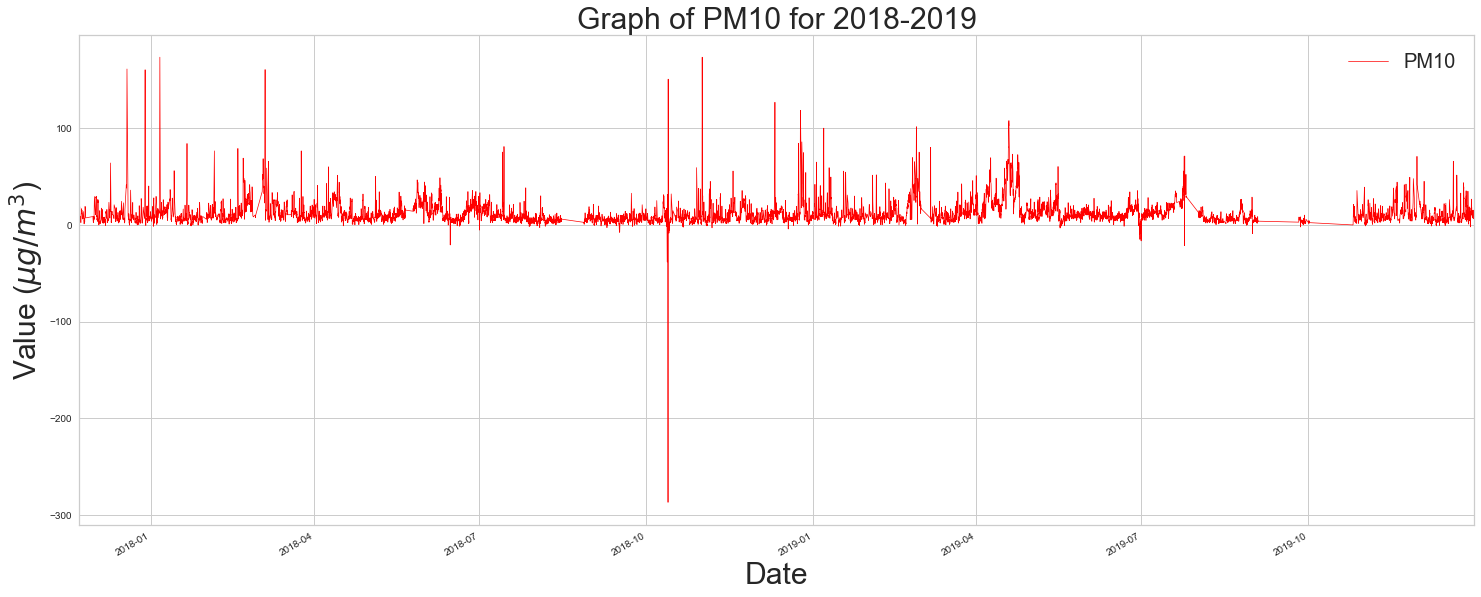

<Figure size 1800x720 with 0 Axes>

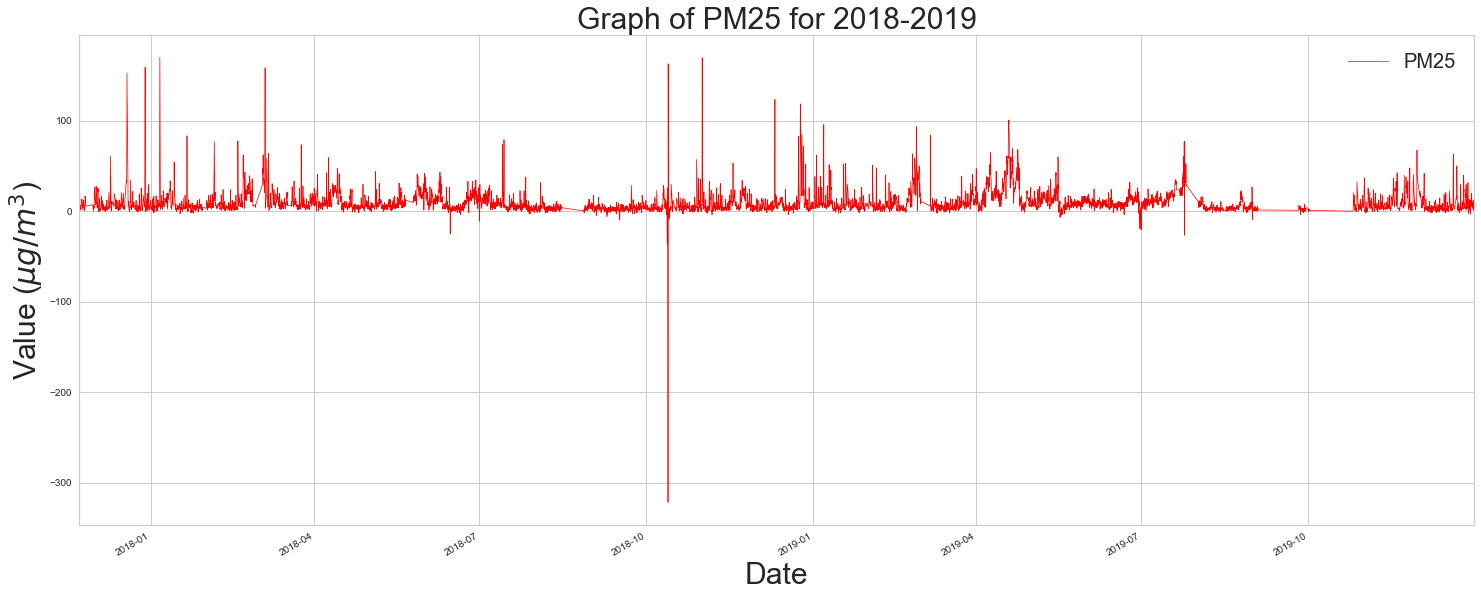

<Figure size 1800x720 with 0 Axes>

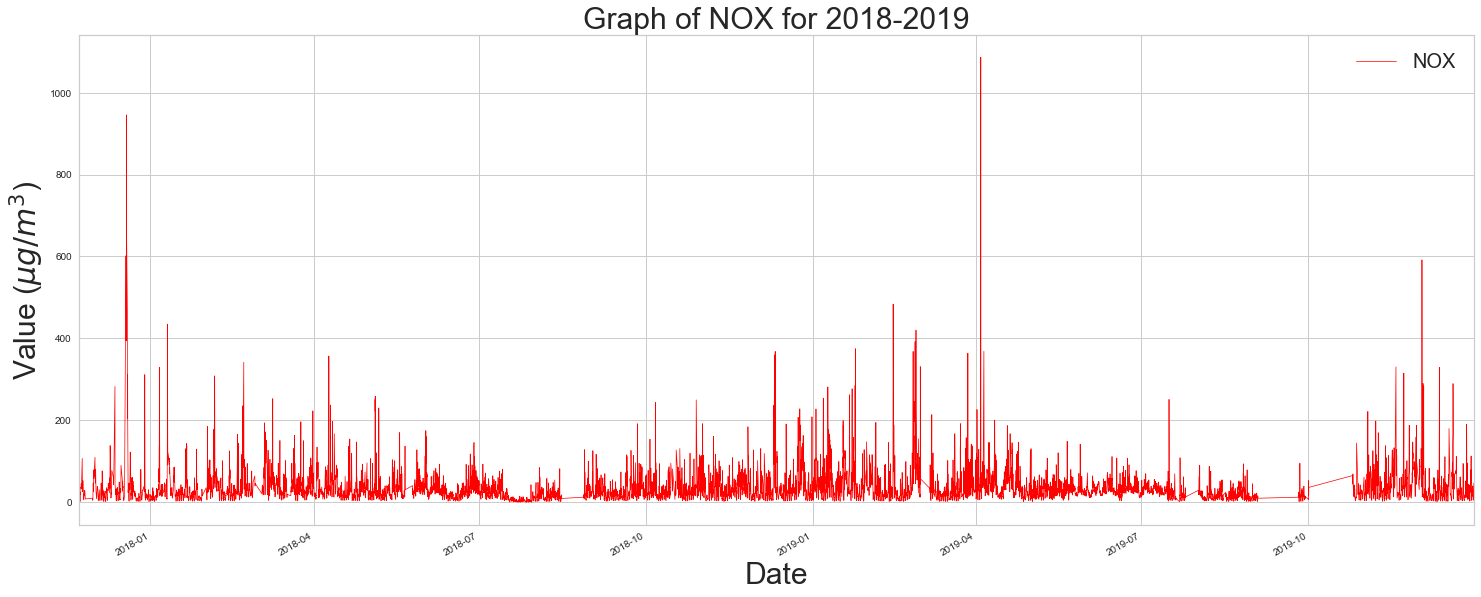

<Figure size 1800x720 with 0 Axes>

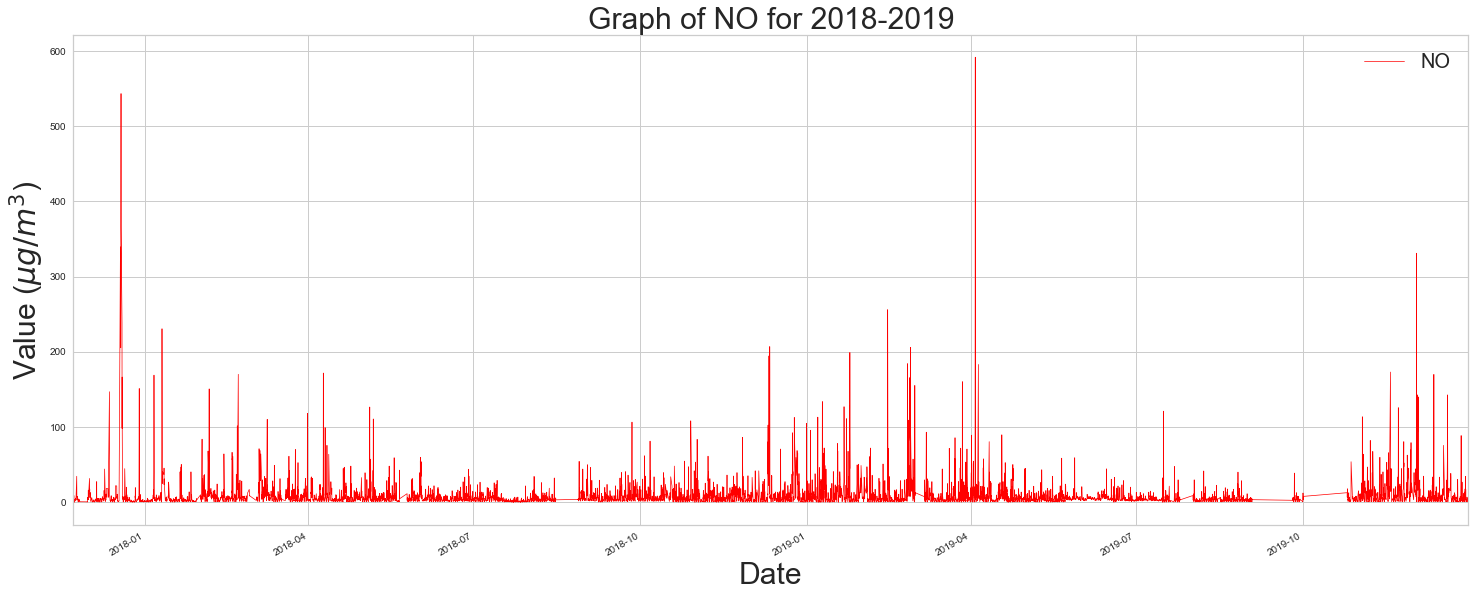

<Figure size 1800x720 with 0 Axes>

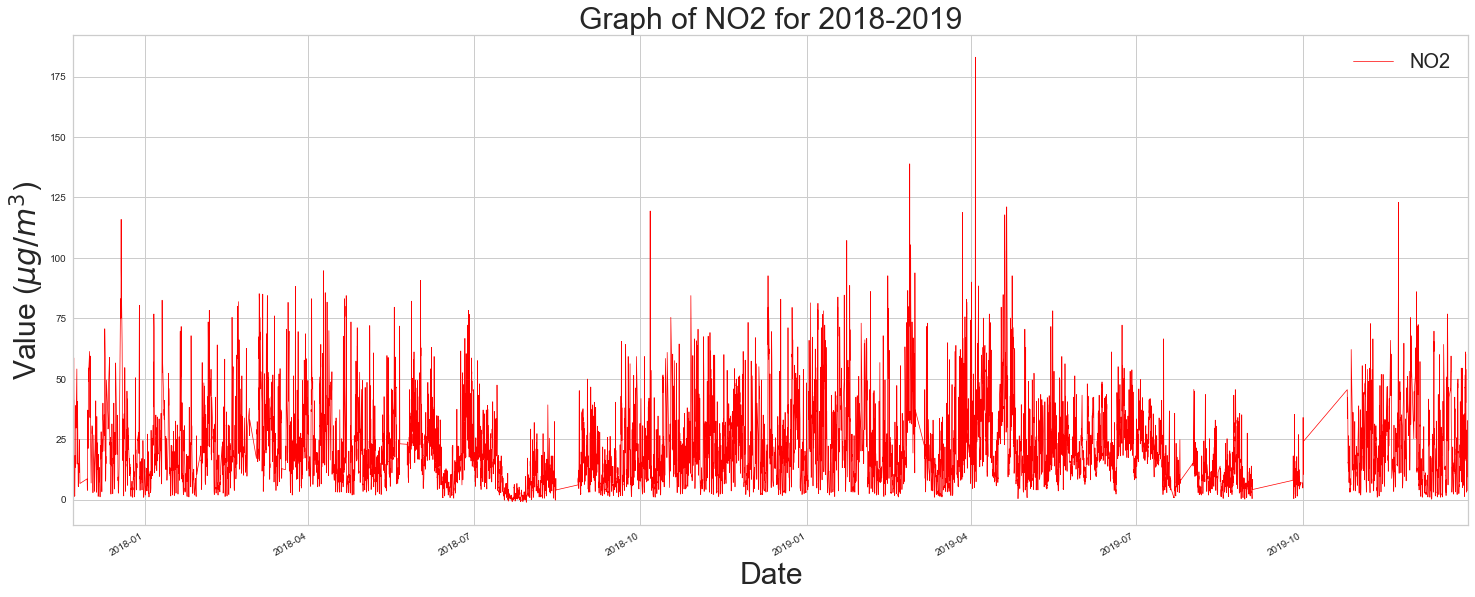

<Figure size 1800x720 with 0 Axes>

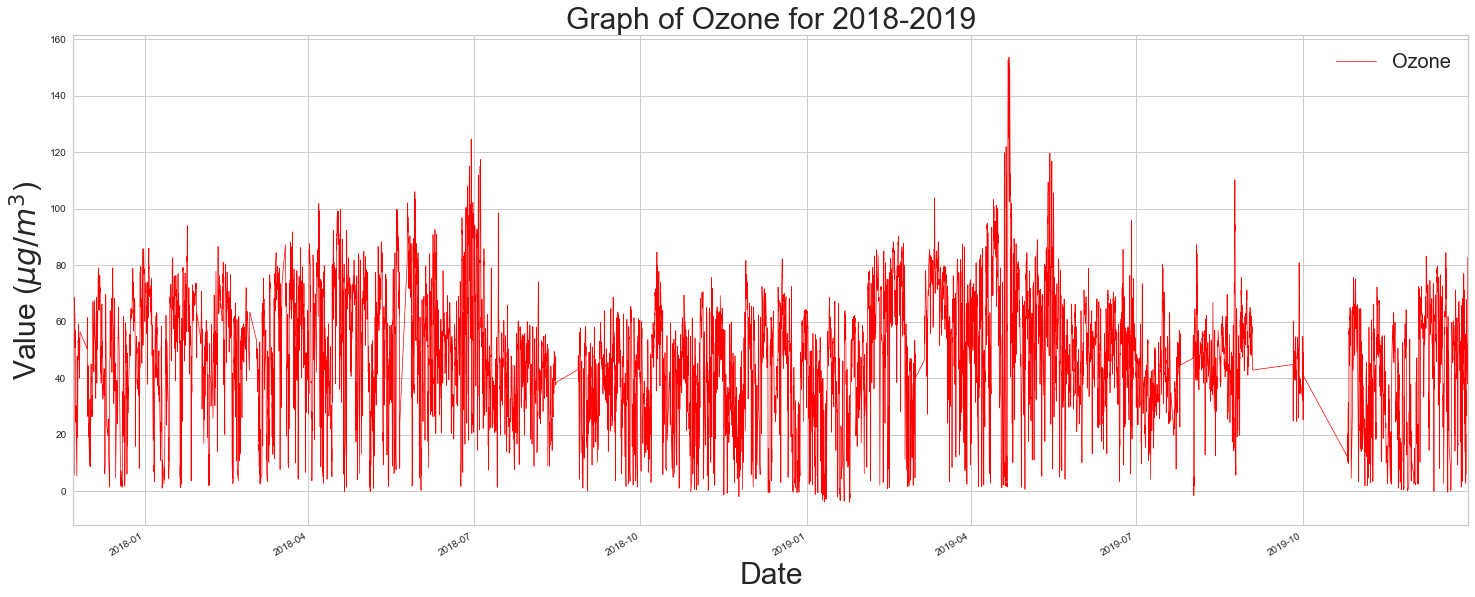

<Figure size 1800x720 with 0 Axes>

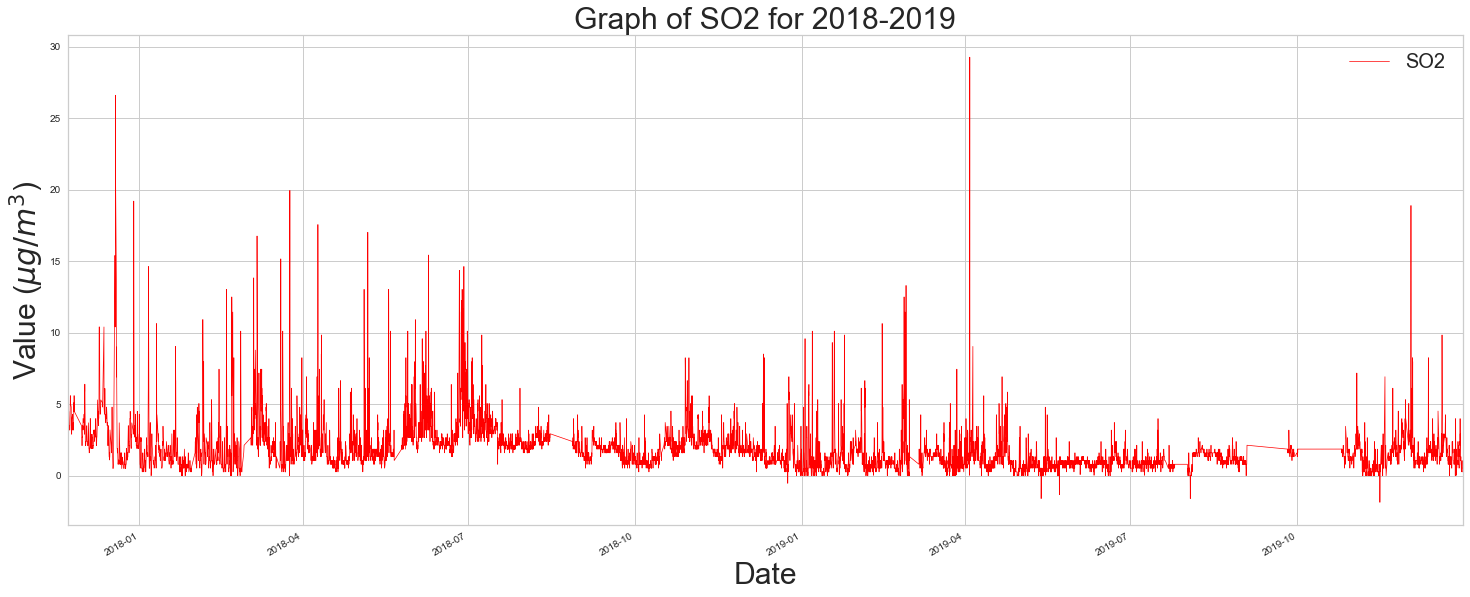

In [53]:
#Let's plot
from matplotlib.pyplot import figure

def PlotFeature(Name, Data1):
    
    Feature = []
    Feature = Data1[Name].values

    Date = []
    Date = Data1['Date'].values

    N_data = len(Data1)
    N = np.zeros(N_data)

    for i in range(N_data):
        N[i] = i
        
    
    Plotsdf = pd.DataFrame(list(zip(Date, Feature)), columns=['Date', Name])
    
    #Plotsdf['SMA_5 PM10 Act'] = Plotsdf.PM10_Actual_Values.rolling(5, min_periods=0).mean()
    #Plotsdf['SMA_5 PM10 Pred'] = Plotsdf.PM10_Predicted_Values.rolling(5, min_periods=0).mean()
    #print(len(PM10))
    #print(len(N))

    figure(figsize=(25, 10))
    
    
    Plotsdf.plot(x='Date', y=Name, linewidth=0.7, figsize=(25, 10), color=['red'])
    plt.title("Graph of {} for 2018-2019".format(Name), fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.ylabel("Value ($\mu g / m^{3}$)", fontsize=30)
    plt.legend(fontsize=20)
    plt.show()
    
PlotFeature('PM10', df)
PlotFeature('PM25', df)
PlotFeature('NOX', df)
PlotFeature('NO', df)
PlotFeature('NO2', df)
PlotFeature('Ozone', df)
PlotFeature('SO2', df)

<Figure size 1800x720 with 0 Axes>

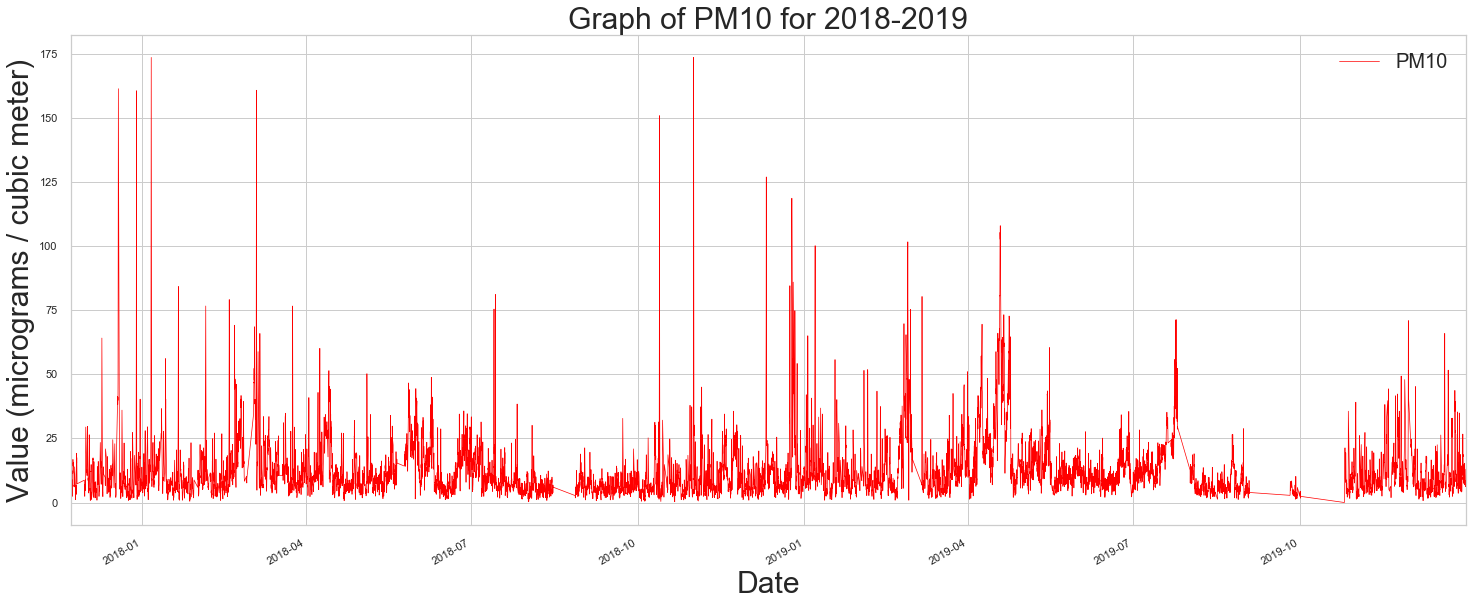

<Figure size 1800x720 with 0 Axes>

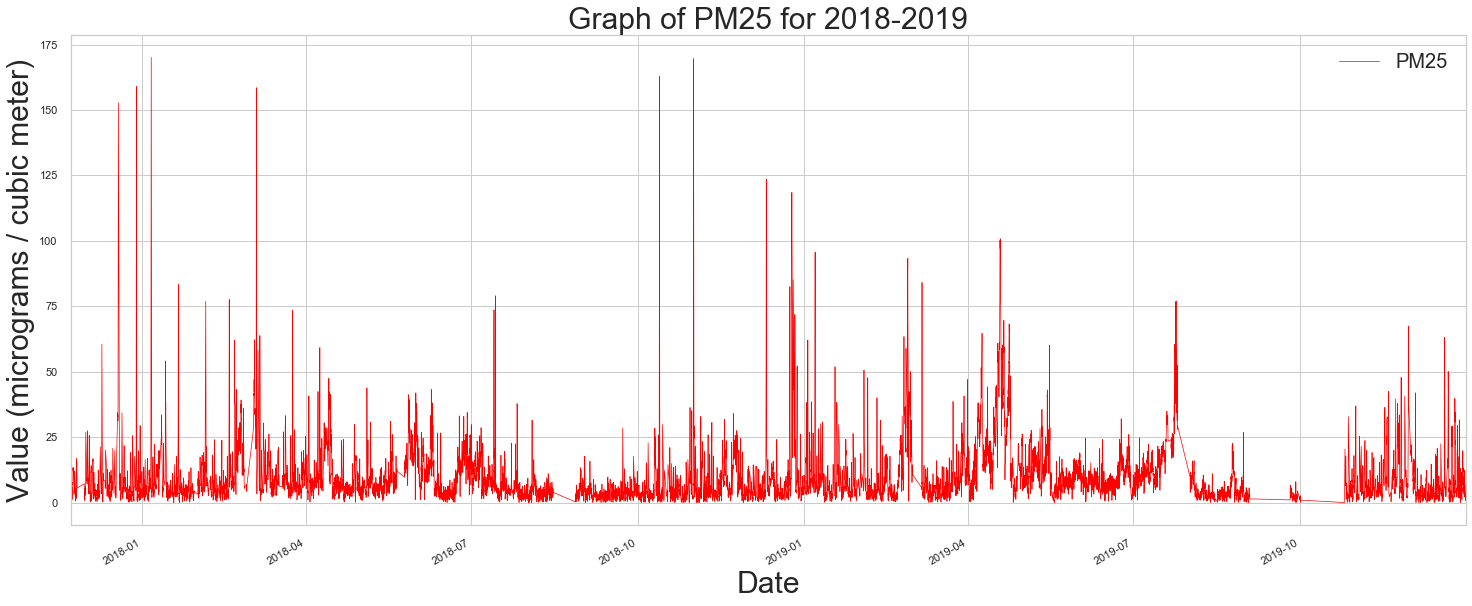

<Figure size 1800x720 with 0 Axes>

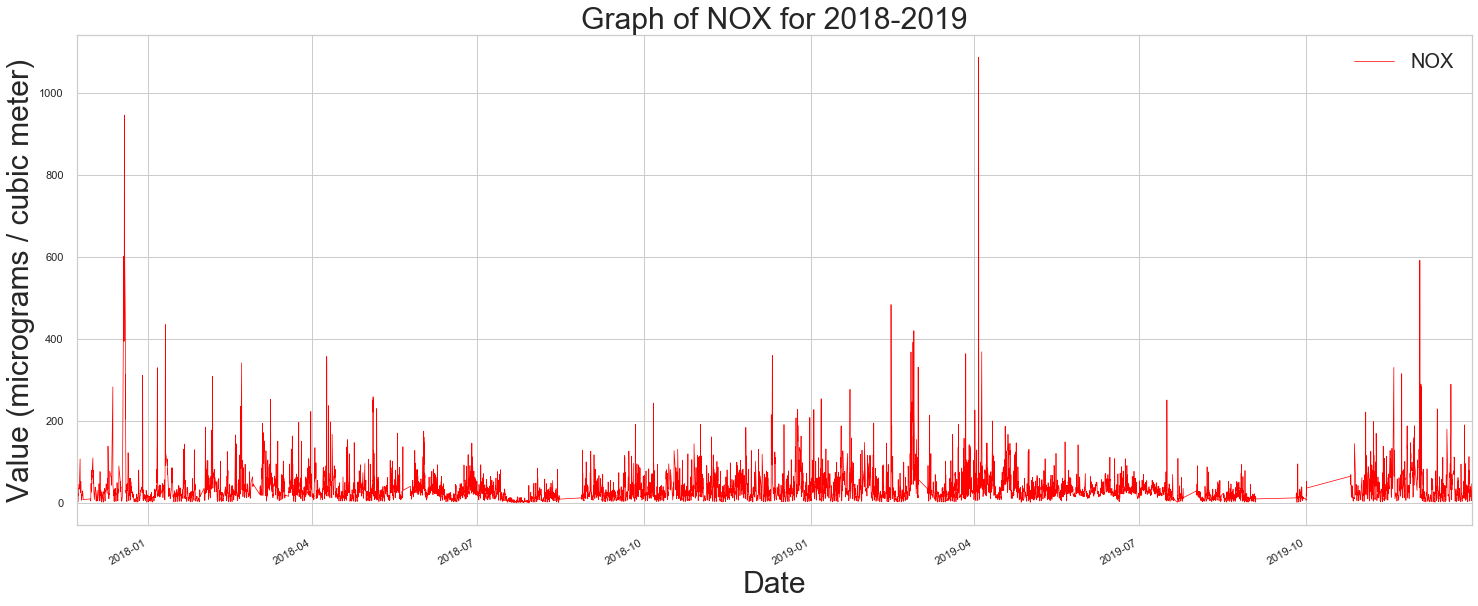

<Figure size 1800x720 with 0 Axes>

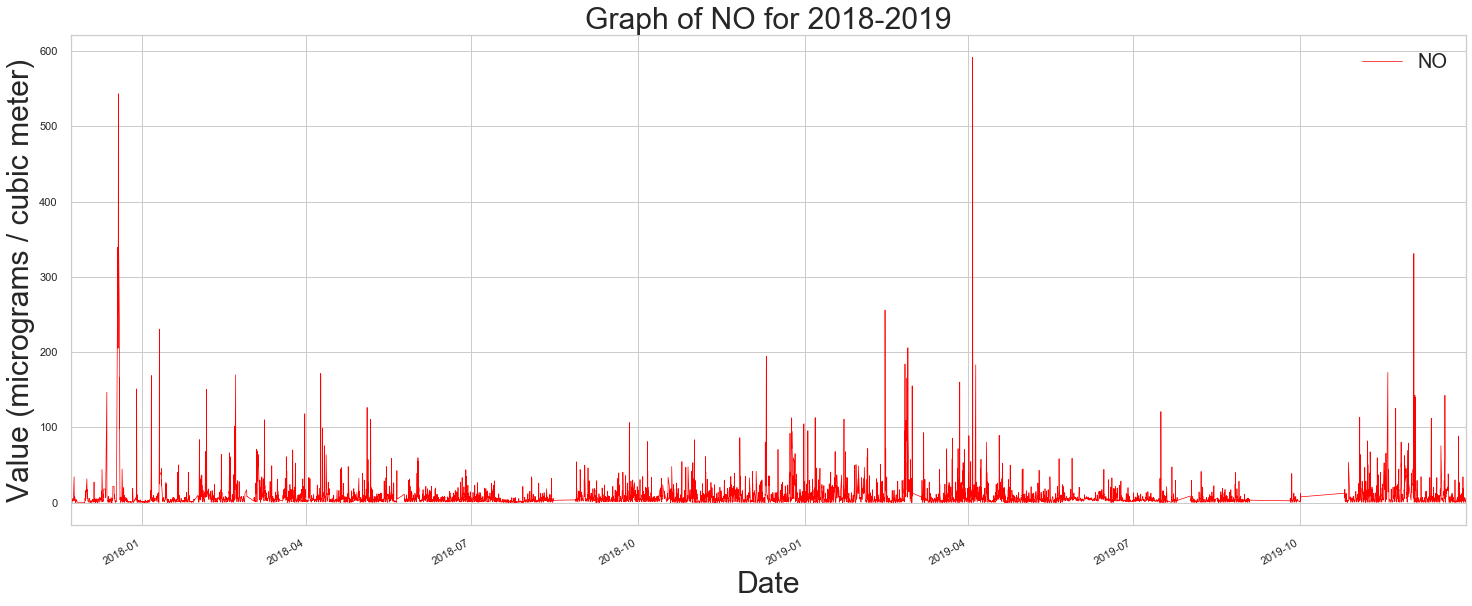

<Figure size 1800x720 with 0 Axes>

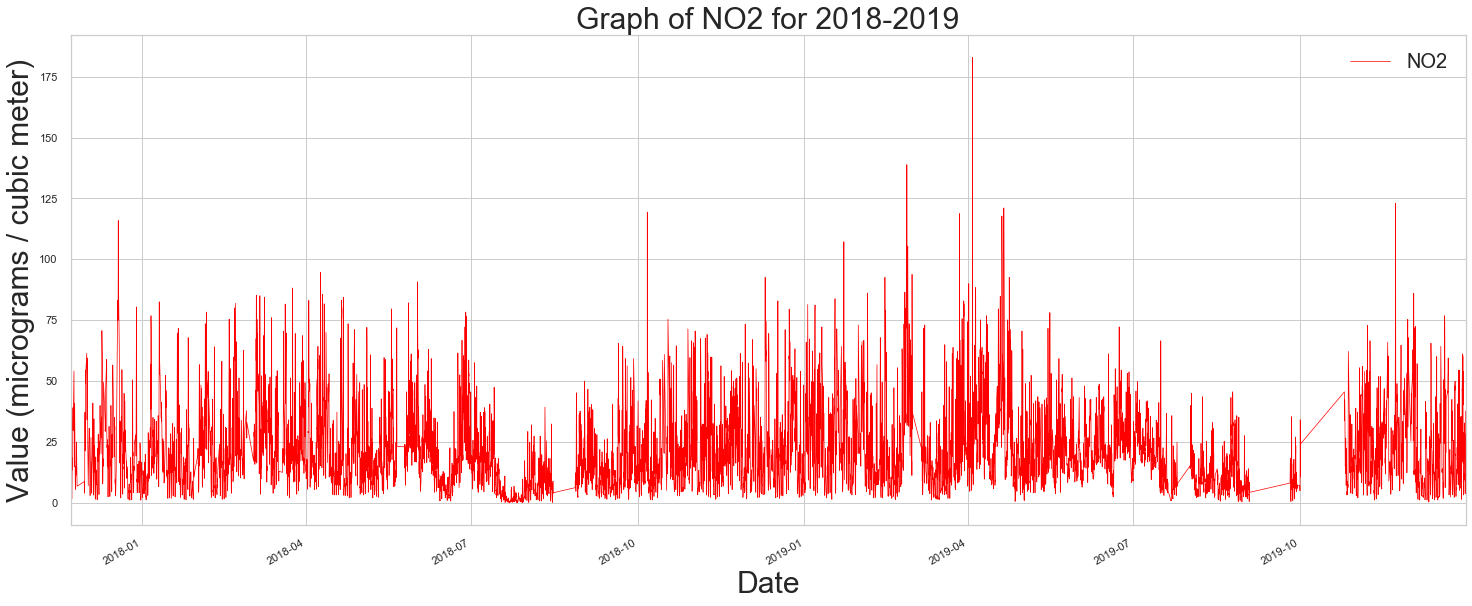

<Figure size 1800x720 with 0 Axes>

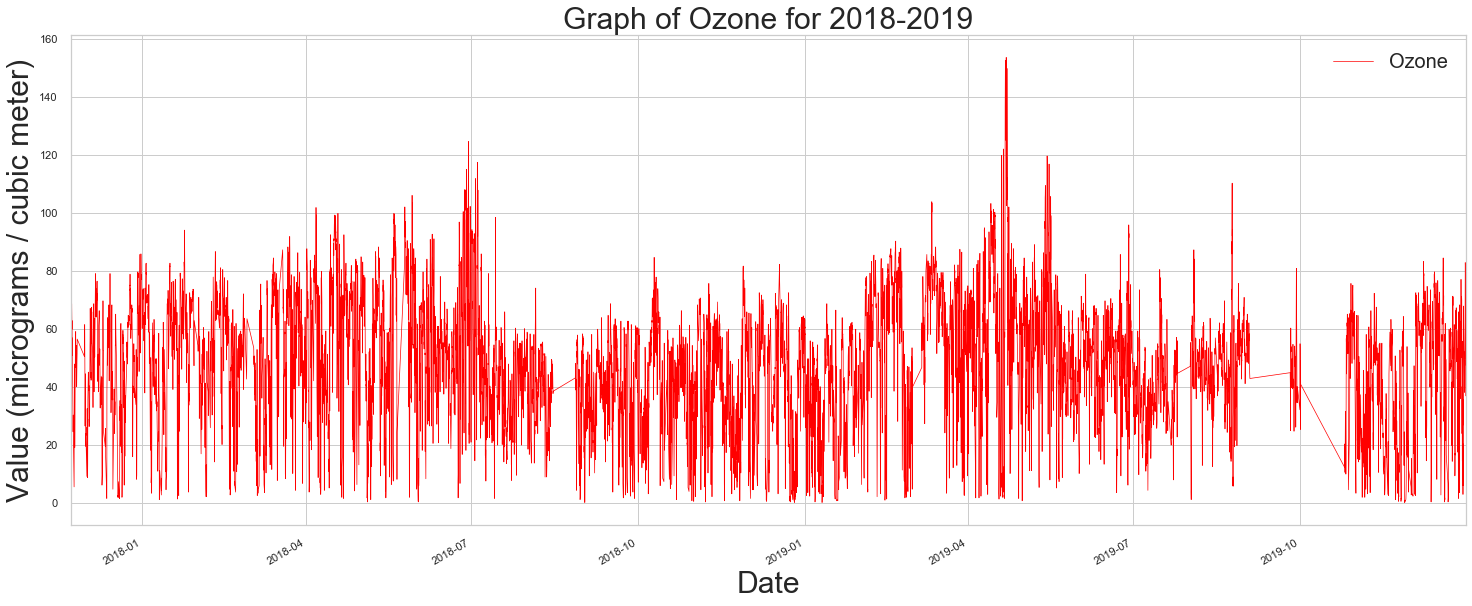

<Figure size 1800x720 with 0 Axes>

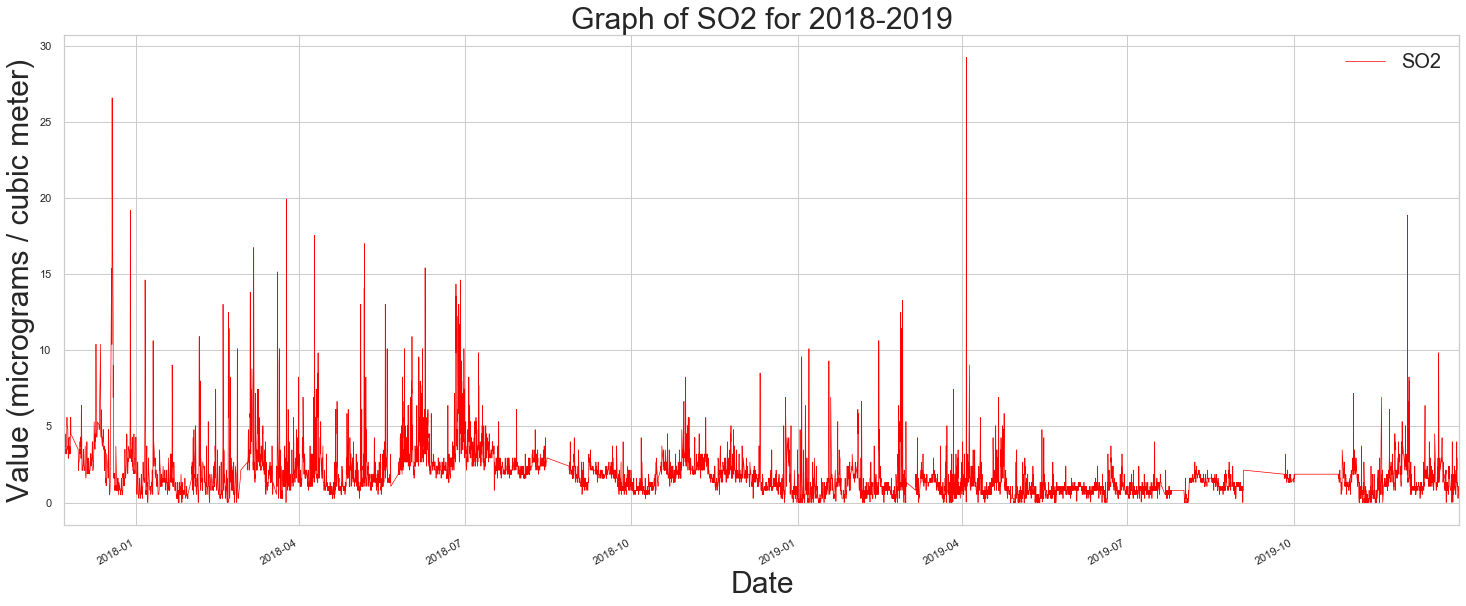

In [56]:
#Remove negative values for the pollutant concentrations 
Posdf = df[(df['SO2'] >= 0) & (df['Ozone'] >= 0) & (df['NO2'] >= 0) & (df['NO'] >= 0) & (df['NOX'] >= 0) & (df['PM25'] >= 0) & (df['PM10'] >= 0)]

PlotFeature('PM10', Posdf)
PlotFeature('PM25', Posdf)
PlotFeature('NOX', Posdf)
PlotFeature('NO', Posdf)
PlotFeature('NO2', Posdf)
PlotFeature('Ozone', Posdf)
PlotFeature('SO2', Posdf)

In [57]:
#Dont need date anymore
df.drop('Date', axis=1, inplace=True)

# Let's look at the data for algorithm

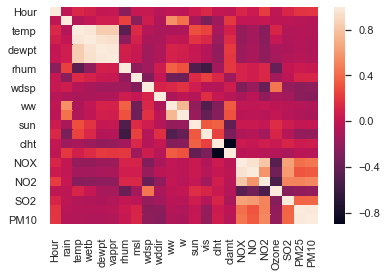

In [58]:
#Heatmap
sns.heatmap(df.corr());

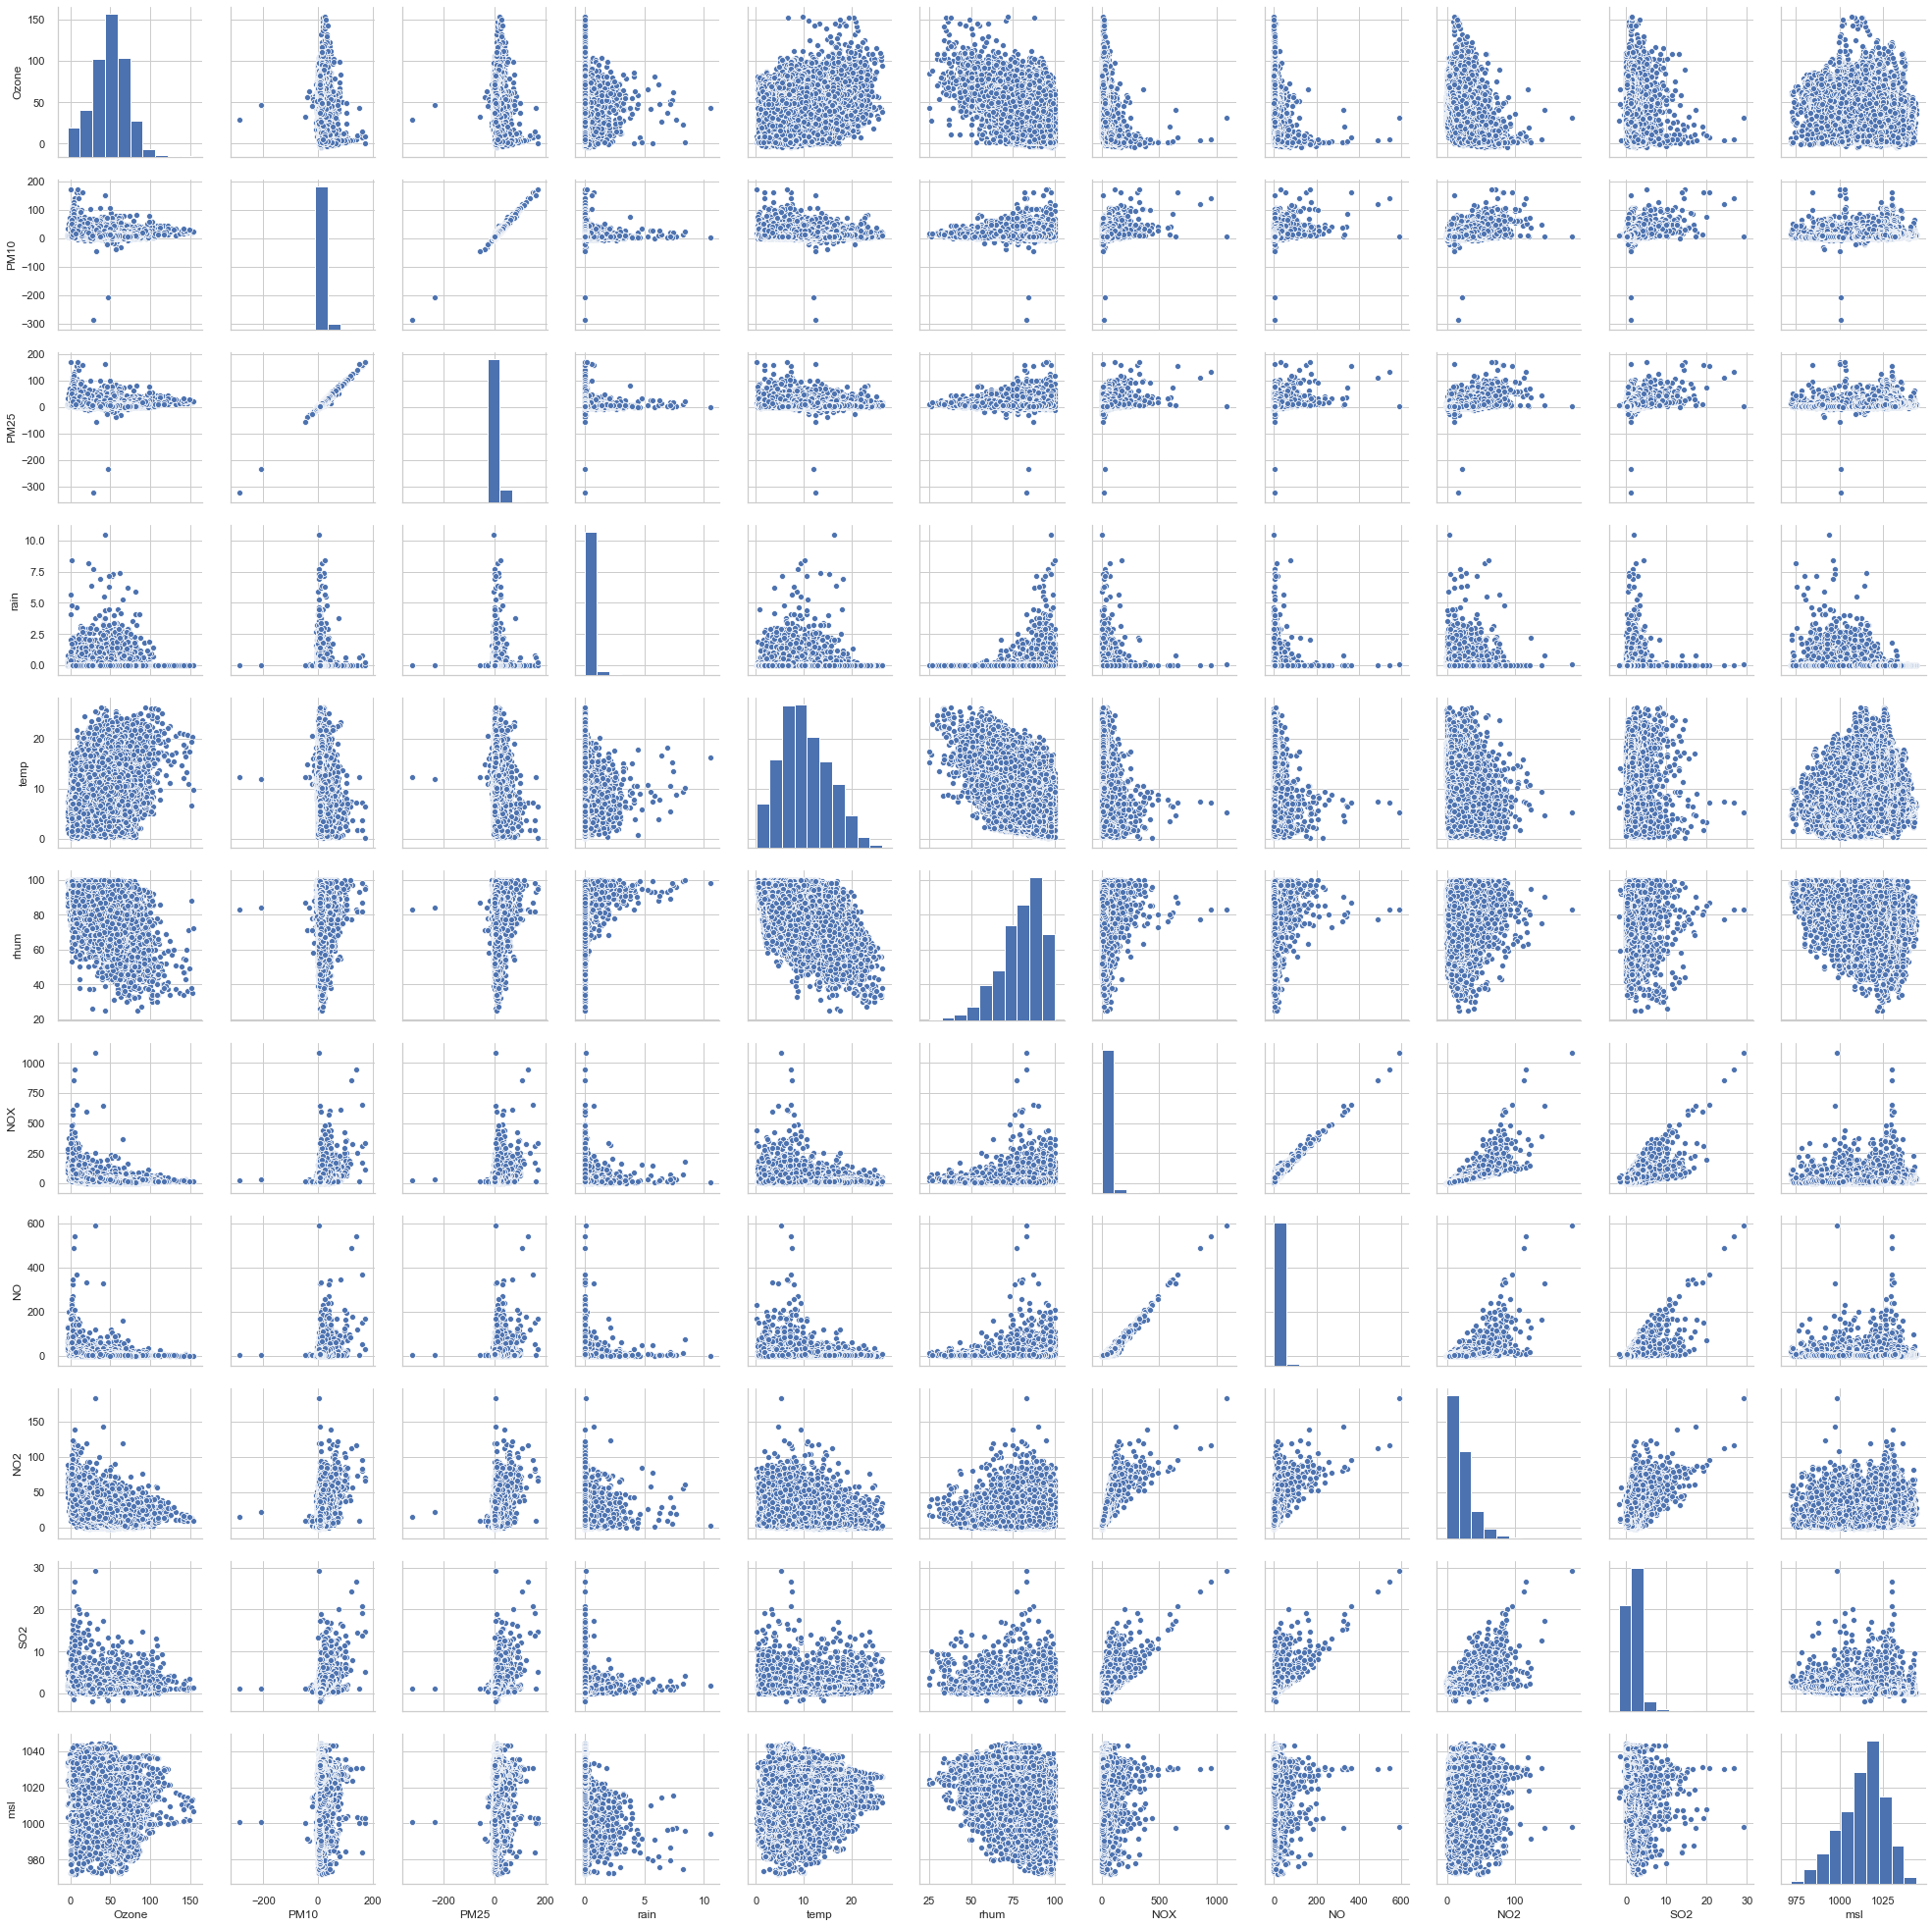

In [59]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['Ozone','PM10','PM25','rain','temp','rhum', 'NOX', 'NO', 'NO2', 'SO2', 'msl']].dropna())
plt.show()

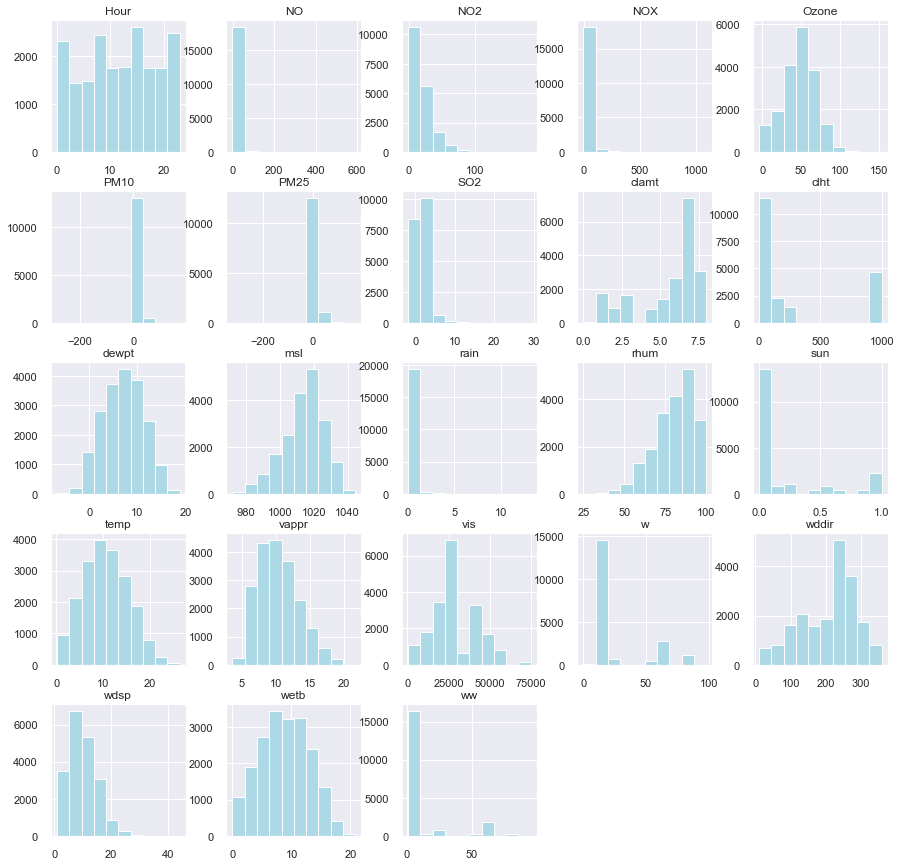

In [60]:
#Histograms
sns.set()
pd.DataFrame.hist(df, figsize = [15,15], color='lightblue')
plt.show()

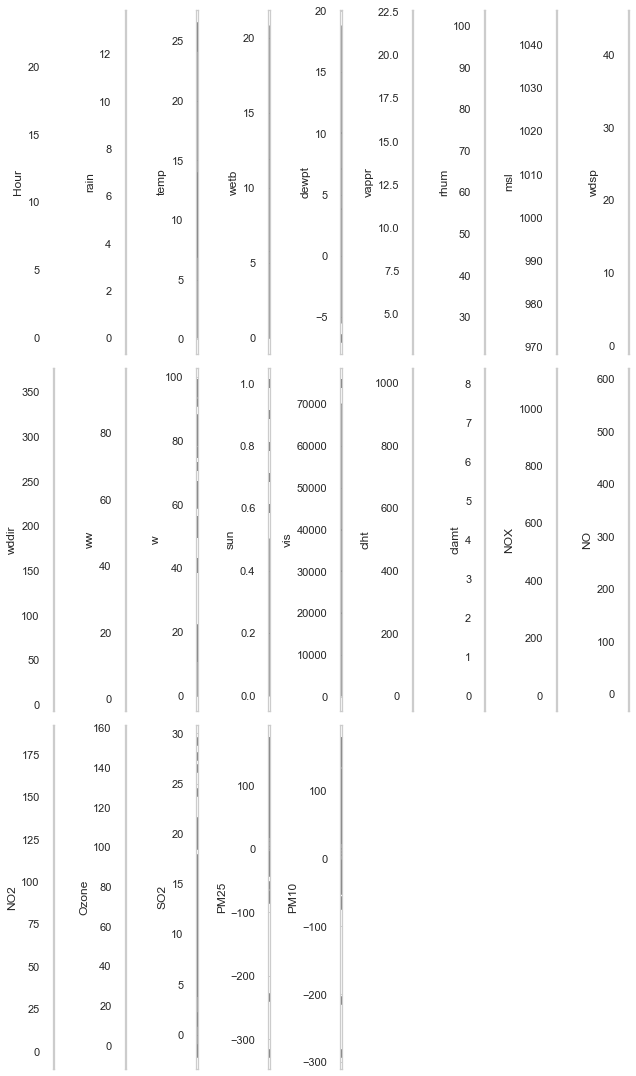

In [61]:
l = df.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='lightblue',orient='v')
    plt.tight_layout()

ValueError: cannot convert float NaN to integer

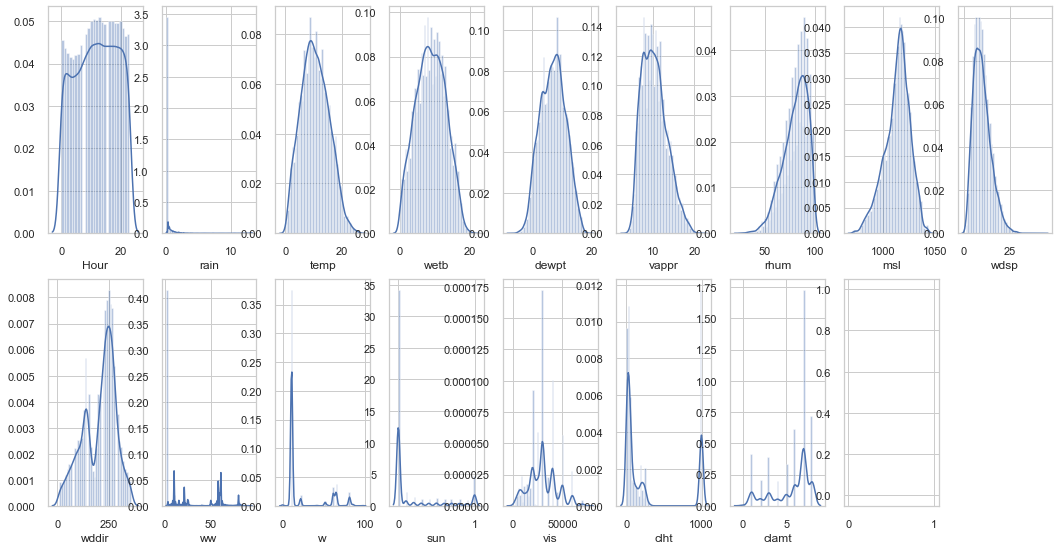

In [62]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

In [63]:
df.describe()

Hour          rain          temp          wetb         dewpt  \
count  19817.000000  19817.000000  19817.000000  19817.000000  19817.000000   
mean      11.824948      0.102871     10.508392      8.828329      7.007085   
std        6.821487      0.439980      4.827058      4.133090      4.186085   
min        0.000000      0.000000      0.100000      0.000000     -6.700000   
25%        6.000000      0.000000      6.900000      5.700000      3.800000   
50%       12.000000      0.000000     10.200000      8.800000      7.100000   
75%       18.000000      0.000000     13.900000     11.900000     10.000000   
max       23.000000     13.200000     26.300000     20.800000     18.800000   

              vappr          rhum           msl          wdsp         wddir  \
count  19817.000000  19817.000000  19817.000000  19817.000000  19817.000000   
mean      10.391603     80.113791   1013.992865      9.976838    206.583237   
std        2.971004     12.243802     12.070754      4.811413     79.481233   
min        3.600000     25.000000    972.000000      1.000000     10.000000   
25%        8.000000     72.000000   1006.700000      6.000000    140.000000   
50%       10.100000     82.000000   1015.500000      9.000000    230.000000   
75%       12.300000     90.000000   1022.200000     13.000000    260.000000   
max       21.700000    100.000000   1044.500000     44.000000    360.000000   

       ...           vis          clht         clamt           NOX  \
count  ...  19817.000000  19817.000000  19817.000000  18798.000000   
mean   ...  29860.125145    289.916587      5.620982     29.896988   
std    ...  13844.001051    397.714491      2.225801     41.031870   
min    ...    300.000000      1.000000      0.000000     -1.000000   
25%    ...  20000.000000     26.000000      4.000000     10.500000   
50%    ...  30000.000000     60.000000      7.000000     19.900000   
75%    ...  40000.000000    250.000000      7.000000     34.600000   
max    ...  75000.000000    999.000000      8.000000   1087.200000   

                 NO           NO2         Ozone           SO2          PM25  \
count  18798.000000  18798.000000  18623.000000  19311.000000  13662.000000   
mean       6.975539     19.251898     47.567968      1.714726      9.460094   
std       19.381010     15.979074     21.061762      1.550657     11.782271   
min       -2.600000     -1.100000     -4.000000     -1.860000   -321.600000   
25%        1.130000      7.800000     34.400000      0.800000      3.400000   
50%        2.800000     14.900000     49.000000      1.330000      6.300000   
75%        5.800000     25.800000     61.600000      2.130000     11.800000   
max      591.800000    183.000000    153.600000     29.260000    170.100000   

               PM10  
count  13662.000000  
mean      12.127968  
std       12.067212  
min     -286.900000  
25%        5.700000  
50%        9.100000  
75%       14.800000  
max      173.500000  

[8 rows x 23 columns]

In [64]:
print('Length of Original cleaned df: {}'.format(len(df)))
print('Length of positive cleaned df: {}'.format(len(Posdf)))

Length of Original cleaned df: 19817
Length of positive cleaned df: 12080


# Adjust data to avoid zero's

In [65]:
Posdf['Hour'] = Posdf['Hour']+1.00
Posdf['rain'] = Posdf['rain']+1.00
Posdf['temp'] = Posdf['temp']+5.50
Posdf['vappr'] = Posdf['vappr']+1.00
Posdf['rhum'] = Posdf['rhum']+1.00
Posdf['wetb'] = Posdf['wetb']+5.60
Posdf['dewpt'] = Posdf['dewpt']+10.80
Posdf['msl'] = Posdf['msl']/1000
Posdf['NOX'] = Posdf['NOX']+1.00
Posdf['NO'] = Posdf['NO']+1.00
Posdf['NO2'] = Posdf['NO2']+1.00
Posdf['SO2'] = Posdf['SO2']+1.00
Posdf['Ozone'] = Posdf['Ozone']+1.00
Posdf['PM10'] = Posdf['PM10']+1.00
Posdf['PM25'] = Posdf['PM25']+1.00

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [66]:
Posdf.describe()

Hour          rain          temp          wetb         dewpt  \
count  12080.000000  12080.000000  12080.000000  12080.000000  12080.000000   
mean      13.004884      1.102906     15.604313     14.006929     17.332624   
std        6.816900      0.431111      4.991816      4.219268      4.223316   
min        1.000000      1.000000      5.700000      5.600000      4.100000   
25%        7.000000      1.000000     11.900000     10.800000     14.100000   
50%       13.000000      1.000000     15.000000     13.700000     17.200000   
75%       19.000000      1.000000     19.100000     17.100000     20.300000   
max       24.000000      9.400000     31.800000     25.700000     29.600000   

              vappr          rhum           msl          wdsp         wddir  \
count  12080.000000  12080.000000  12080.000000  12080.000000  12080.000000   
mean      11.071407     80.772765      1.013391      9.682368    200.884934   
std        2.966190     12.556781      0.012757      4.734146     82.114433   
min        4.600000     26.000000      0.972000      1.000000     10.000000   
25%        8.800000     73.000000      1.005400      6.000000    140.000000   
50%       10.600000     83.000000      1.015300      9.000000    220.000000   
75%       12.900000     90.000000      1.022200     12.000000    260.000000   
max       22.700000    101.000000      1.044500     34.000000    360.000000   

       ...           vis          clht         clamt           NOX  \
count  ...  12080.000000  12080.000000  12080.000000  12080.000000   
mean   ...  29647.160596    300.114073      5.559768     32.607135   
std    ...  14071.127087    401.461442      2.242609     39.445527   
min    ...    300.000000      1.000000      0.000000      1.200000   
25%    ...  20000.000000     27.750000      4.000000     13.400000   
50%    ...  30000.000000     60.000000      7.000000     23.500000   
75%    ...  40000.000000    250.000000      7.000000     38.410000   
max    ...  75000.000000    999.000000      8.000000   1088.200000   

                 NO           NO2         Ozone           SO2          PM25  \
count  12080.000000  12080.000000  12080.000000  12080.000000  12080.000000   
mean       8.256675     21.538309     49.758096      2.818547     11.044280   
std       18.290070     16.165343     21.408540      1.614692     11.329389   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.500000      9.800000     36.000000      1.800000      4.700000   
50%        4.400000     17.600000     50.800000      2.330000      7.700000   
75%        7.600000     28.500000     63.800000      3.390000     13.300000   
max      592.800000    184.000000    154.600000     30.260000    171.100000   

               PM10  
count  12080.000000  
mean      13.703228  
std       11.696455  
min        1.000000  
25%        7.100000  
50%       10.400000  
75%       16.300000  
max      174.500000  

[8 rows x 23 columns]

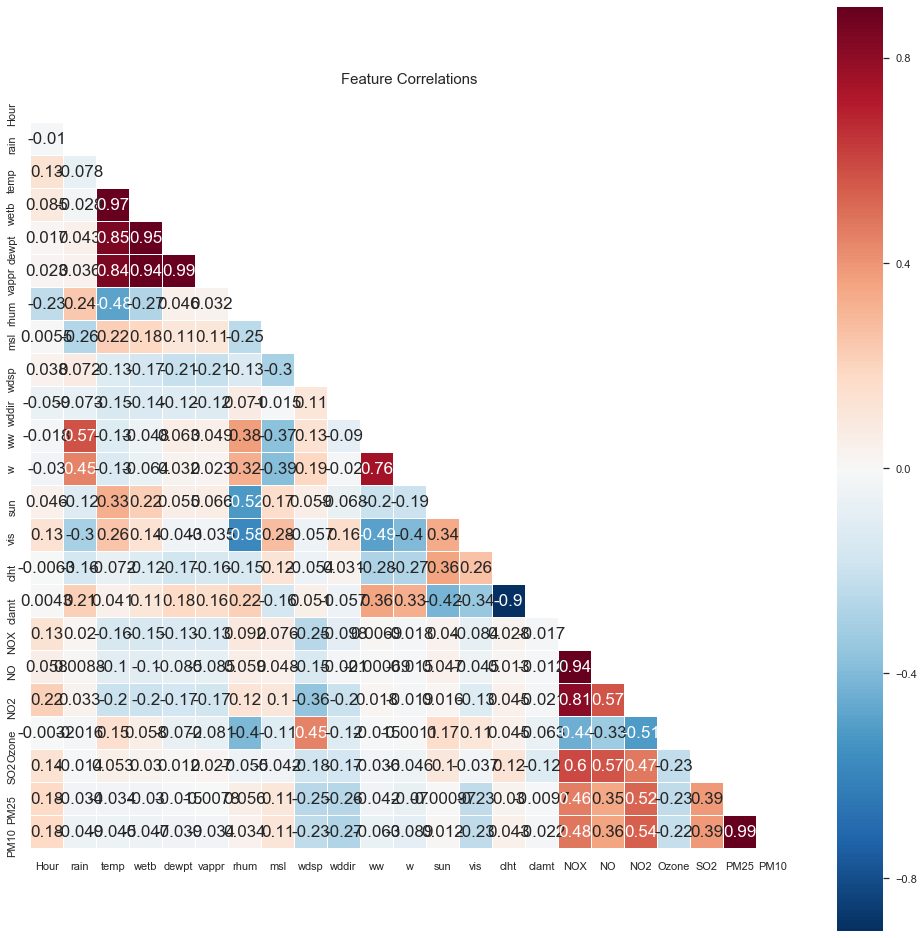

In [67]:
#Mask
mask = np.zeros_like(Posdf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (17,17))
sns.heatmap(Posdf.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True,
            annot_kws={"size":17})
plt.title("Feature Correlations", y = 1.4,fontsize = 15)
plt.rcParams['axes.labelsize'] = 15
import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
plt.show()

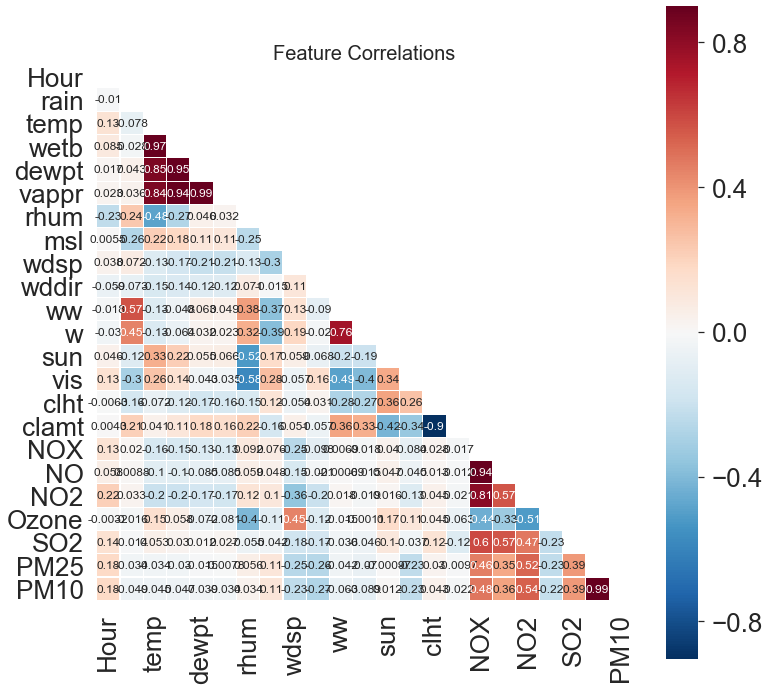

In [69]:
mask = np.zeros_like(Posdf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(Posdf.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Feature Correlations", y = 1.03,fontsize = 20)
plt.show()